In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## _Solution from Scracth_

Before using built-in libraries, I built a logistic regression model from scratch to predict survival outcomes based on some features.


In [2]:
class CustomLogisticRegression:
    def __init__(self, alpha = 0.001, iterations=10000):
        self.alpha = alpha
        self.iterations = iterations
        self.w = None
        self.losses = []
        
    def sigmoid(self, x):
        return 1.0 / (1 + np.exp(-x))
    
    def calculate_cost(self, h, Y):
        cost = (-Y * np.log(h) - (1 - Y) * np.log(1 - h)).mean()
        return cost
    
    def fit(self, X, Y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        for i in range(self.iterations):
            z = np.dot(X, self.w)
            h = self.sigmoid(z)
            diff = h - Y
            gradient = np.dot(X.T, diff) / n_samples
            self.w = self.w - self.alpha * gradient
            
            cost = self.calculate_cost(h, Y)
            self.losses.append(cost)
            
        return self.w
    
    def predict(self, X):
        z = np.dot(X, self.w)
        h = self.sigmoid(z)
        return np.where(h >= 0.5, 1, 0)

## _Data Processing_

In [3]:
df = pd.read_csv('titanic.csv')
df = df.sample(len(df)).copy()

- **PassengerId**: Unique identifier for each passenger.
- **Survived**: Binary variable indicating whether the passenger survived (1) or not (0).
- **Pclass**: Ticket class (1st, 2nd, 3rd).
- **Name**: Passenger’s name.
- **Sex**: Passenger’s gender.
- **Age**: Passenger’s age.
- **SibSp**: Number of siblings/spouses of the passenger aboard the Titanic.
- **Parch**: Number of parents/children of the passenger aboard the Titanic.
- **Ticket**: Ticket number.
- **Fare**: Passenger fare.
- **Cabin**: Cabin number.
- **Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
577,578,1,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.0,1,0,13507,55.9000,E44,S
753,754,0,3,"Jonkoff, Mr. Lalio",male,23.0,0,0,349204,7.8958,NaN,S
411,412,0,3,"Hart, Mr. Henry",male,NaN,0,0,394140,6.8583,NaN,Q
178,179,0,2,"Hale, Mr. Reginald",male,30.0,0,0,250653,13.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
342,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
215,216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C
431,432,1,3,"Thorneycroft, Mrs. Percival (Florence Kate White)",female,NaN,1,0,376564,16.1000,NaN,S
635,636,1,2,"Davis, Miss. Mary",female,28.0,0,0,237668,13.0000,NaN,S


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### _We can see that "Age" data for records is skewed, therefore, let's fill the missing values for that variable with the median value_

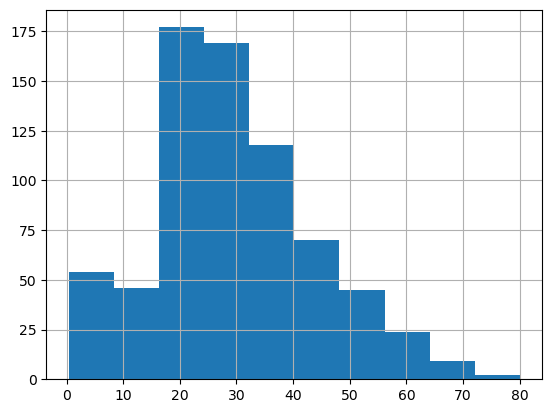

In [7]:
ax = df['Age'].hist()
df.loc[df['Age'].isna(), 'Age'] = df['Age'].median()

In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### _Since most (529 out of the 891) of the records  miss 'Cabin', we can ignore that variable_

In [9]:
df.drop('Cabin', axis=1, inplace=True)

In [10]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

### _We can also drop those 2 records with missing value_

In [11]:
df.dropna(inplace=True)

In [12]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### _Done with missing values_

In [13]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
577,578,1,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.0,1,0,13507,55.9000,S
753,754,0,3,"Jonkoff, Mr. Lalio",male,23.0,0,0,349204,7.8958,S
411,412,0,3,"Hart, Mr. Henry",male,28.0,0,0,394140,6.8583,Q
178,179,0,2,"Hale, Mr. Reginald",male,30.0,0,0,250653,13.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
342,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
215,216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,C
431,432,1,3,"Thorneycroft, Mrs. Percival (Florence Kate White)",female,28.0,1,0,376564,16.1000,S
635,636,1,2,"Davis, Miss. Mary",female,28.0,0,0,237668,13.0000,S


### _Instead of having two distinct column names - SibSp and Parch, let's combine them in one variable under the name of "SoloTraveler"_

In [14]:
df['SibSp'].value_counts()

SibSp
0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [15]:
df['Parch'].value_counts()

Parch
0    676
1    118
2     80
3      5
5      5
4      4
6      1
Name: count, dtype: int64

In [16]:
df['SoloTraveler'] = ((df['SibSp'] + df['Parch']) > 0).astype(int)

In [17]:
df.drop('SibSp', axis=1, inplace=True)

In [18]:
df.drop('Parch', axis=1, inplace=True)

In [19]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,SoloTraveler
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,349909,21.0750,S,1
577,578,1,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.0,13507,55.9000,S,1
753,754,0,3,"Jonkoff, Mr. Lalio",male,23.0,349204,7.8958,S,0
411,412,0,3,"Hart, Mr. Henry",male,28.0,394140,6.8583,Q,0
178,179,0,2,"Hale, Mr. Reginald",male,30.0,250653,13.0000,S,0
...,...,...,...,...,...,...,...,...,...,...
342,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,248740,13.0000,S,0
215,216,1,1,"Newell, Miss. Madeleine",female,31.0,35273,113.2750,C,1
431,432,1,3,"Thorneycroft, Mrs. Percival (Florence Kate White)",female,28.0,376564,16.1000,S,1
635,636,1,2,"Davis, Miss. Mary",female,28.0,237668,13.0000,S,0


### _Since columns 'Pclass', 'Sex', and 'Embarked' contain categorical data, we can get dummy values for them for making it numerical later on_

In [20]:
df = pd.get_dummies(df, columns = ['Pclass', 'Sex', 'Embarked'])

### _Since 'Sex_male' is enough to decide on the passenger's gender we can remove 'Sex_female'. Furthermore, there is no need for 'PassengerId' and 'Name' since they do not have any effect on passenger's survival chance_

In [21]:
df.drop('Sex_female', axis=1, inplace=True)
df.drop('PassengerId', axis=1, inplace=True)
df.drop('Name', axis=1, inplace=True)

In [22]:
df['Ticket'].value_counts()

Ticket
CA. 2343    7
1601        7
347082      7
3101295     6
347088      6
           ..
364511      1
7545        1
349216      1
113773      1
237668      1
Name: count, Length: 680, dtype: int64

### _'Ticket' does not have any importance either_

In [23]:
df.drop('Ticket', axis=1, inplace=True)

In [24]:
df

,Survived,Age,Fare,SoloTraveler,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S
567,0,29.0,21.0750,1,False,False,True,False,False,False,True
577,1,39.0,55.9000,1,True,False,False,False,False,False,True
753,0,23.0,7.8958,0,False,False,True,True,False,False,True
411,0,28.0,6.8583,0,False,False,True,True,False,True,False
178,0,30.0,13.0000,0,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
342,0,28.0,13.0000,0,False,True,False,True,False,False,True
215,1,31.0,113.2750,1,True,False,False,False,True,False,False
431,1,28.0,16.1000,1,False,False,True,False,False,False,True
635,1,28.0,13.0000,0,False,True,False,False,False,False,True


### _Pclass_3 is not necessary since we can get it from the values of Pclass_1 and Pclass_2. Same goes for Embarked_S_

In [25]:
df.drop(['Pclass_3', 'Embarked_S'], axis=1, inplace=True)
df

,Survived,Age,Fare,SoloTraveler,Pclass_1,Pclass_2,Sex_male,Embarked_C,Embarked_Q
567,0,29.0,21.0750,1,False,False,False,False,False
577,1,39.0,55.9000,1,True,False,False,False,False
753,0,23.0,7.8958,0,False,False,True,False,False
411,0,28.0,6.8583,0,False,False,True,False,True
178,0,30.0,13.0000,0,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...
342,0,28.0,13.0000,0,False,True,True,False,False
215,1,31.0,113.2750,1,True,False,False,True,False
431,1,28.0,16.1000,1,False,False,False,False,False
635,1,28.0,13.0000,0,False,True,False,False,False


### _Let's take 90% of data for training and remaining 10% for testing_

In [26]:
split_index = int(0.9 * len(df))
df_train = df[:split_index].copy()
df_test = df[split_index:].copy()

In [27]:
inputs = pd.DataFrame(np.column_stack((np.ones(len(df_train)), df_train.drop(columns='Survived'))).astype(float))
# df_test_copy = np.array(np.column_stack((np.ones(len(df_test)), df_test)).astype(float))

In [28]:
inputs

,0,1,2,3,4,5,6,7,8
0,1.0,29.00,21.0750,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,39.00,55.9000,1.0,1.0,0.0,0.0,0.0,0.0
2,1.0,23.00,7.8958,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,28.00,6.8583,0.0,0.0,0.0,1.0,0.0,1.0
4,1.0,30.00,13.0000,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
795,1.0,26.00,20.5750,1.0,0.0,0.0,1.0,0.0,0.0
796,1.0,28.00,7.7750,0.0,0.0,0.0,1.0,0.0,0.0
797,1.0,42.00,52.0000,1.0,1.0,0.0,1.0,0.0,0.0
798,1.0,28.00,7.2250,0.0,0.0,0.0,1.0,1.0,0.0


In [29]:
y = df_train['SoloTraveler']

In [30]:
y

567    1
577    1
753    0
411    0
178    0
      ..
93     1
107    0
35     1
354    0
78     1
Name: SoloTraveler, Length: 800, dtype: int32

In [31]:
model = CustomLogisticRegression()

In [32]:
model.fit(inputs, y)

array([-0.10160431, -0.03634537,  0.01120594,  1.5881142 , -0.01989962,
        0.0705639 , -0.39171867,  0.02219671, -0.07168893])

In [33]:
predicted_1 = model.predict(df_test.astype(float))
predicted_1

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1])

In [34]:
actual = np.array(df_test['Survived'])
actual

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1], dtype=int64)

In [35]:
df_test

,Survived,Age,Fare,SoloTraveler,Pclass_1,Pclass_2,Sex_male,Embarked_C,Embarked_Q
570,1,62.0,10.5000,0,False,True,True,False,False
23,1,28.0,35.5000,0,True,False,True,False,False
483,1,63.0,9.5875,0,False,False,False,False,False
205,0,2.0,10.4625,1,False,False,False,False,False
816,0,23.0,7.9250,0,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
342,0,28.0,13.0000,0,False,True,True,False,False
215,1,31.0,113.2750,1,True,False,False,True,False
431,1,28.0,16.1000,1,False,False,False,False,False
635,1,28.0,13.0000,0,False,True,False,False,False


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [37]:
accuracy_1 = accuracy_score(actual, predicted_1)
accuracy_1

0.6629213483146067

In [38]:
precision_1 = precision_score(actual, predicted_1)
precision_1

0.575

In [39]:
recall_1 = recall_score(actual, predicted_1)
recall_1

0.6388888888888888

### _Let's plot our cost function_

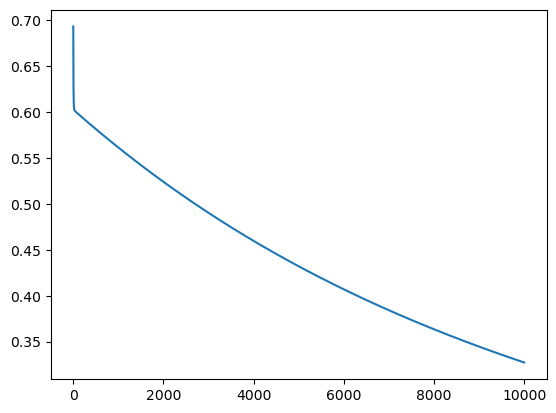

In [40]:
plt.plot(model.losses)

## _Solution Using Built-in Libraries_

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
model_2 = LogisticRegression(max_iter = 10000)

In [43]:
df_train.drop(columns = 'Survived', inplace=True)

In [44]:
model_2.fit(df_train, y)

LogisticRegression(max_iter=10000)

In [45]:
df_test.columns

Index(['Survived', 'Age', 'Fare', 'SoloTraveler', 'Pclass_1', 'Pclass_2',
       'Sex_male', 'Embarked_C', 'Embarked_Q'],
      dtype='object')

In [46]:
df_test.drop(columns='Survived', inplace=True)

In [47]:
predicted_2 = model_2.predict(df_test)
predicted_2

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1])

In [48]:
actual

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1], dtype=int64)

In [49]:
accuracy_2 = accuracy_score(actual, predicted_2)
accuracy_2

0.651685393258427

In [50]:
precision_2 = precision_score(actual, predicted_2)
precision_2

0.5641025641025641

In [51]:
recall_2 = precision_score(actual, predicted_2)
recall_2

0.5641025641025641

In [52]:
coefficients = model_2.coef_[0]
coefficients

array([-1.43394603e-02,  4.17960320e-03,  7.63112903e+00,  9.24956289e-02,
        1.01379691e-01, -4.74280268e-01,  4.25193070e-02, -1.81479927e-01])

In [53]:
model_2.intercept_[0]

-3.5146487993186715

In [54]:
from IPython.display import display, Markdown

markdown_text = f"""


## Conclusion
I built two logistic regression models to predict survival on the Titanic: one from scratch and one using built-in functions. Here are the performance metrics for both models:

| Metric      | Scratch Model | Built-in Model |
|-------------|----------------|----------------|
| Accuracy    | {accuracy_1*100:.2f}%      | {accuracy_2*100:.2f}%      |
| Precision   | {precision_1*100:.2f}%     | {precision_2*100:.2f}%     |
| Recall      | {recall_1*100:.2f}%        | {recall_2*100:.2f}%        |

The values are close to each other, indicating that both models perform similarly. To further improve the model, feeding more data into the model could be beneficial.

#### _Coefficient Interpretation_

Analyzing the final coefficients of our logistic regression model, we get some insights:

- **Age**: Older passengers had a slightly lower chance of survival.
- **Fare**: Passengers who paid higher fares had a marginally better chance of survival.
- **Solo Traveler**: Solo travelers had a higher likelihood of survival compared to those traveling with family.
- **Pclass (Passenger Class)**:
  - First-class and second-class passengers had a slightly higher chance of survival compared to third-class passengers.
- **Sex**: Male passengers had a lower chance of survival compared to female passengers.
- **Embarked (Boarding Port)**:
  - Passengers who boarded the Titanic at Cherbourg (C) had a higher chance of survival compared to those who embarked at Southampton (S).
  - Passengers who boarded the Titanic at Queenstown (Q) had a lower chance of survival compared to those who embarked at Southampton (S).
"""

display(Markdown(markdown_text))





## Conclusion
I built two logistic regression models to predict survival on the Titanic: one from scratch and one using built-in functions. Here are the performance metrics for both models:

| Metric      | Scratch Model | Built-in Model |
|-------------|----------------|----------------|
| Accuracy    | 66.29%      | 65.17%      |
| Precision   | 57.50%     | 56.41%     |
| Recall      | 63.89%        | 56.41%        |

The values are close to each other, indicating that both models perform similarly. To further improve the model, feeding more data into the model could be beneficial.

#### _Coefficient Interpretation_

Analyzing the final coefficients of our logistic regression model, we get some insights:

- **Age**: Older passengers had a slightly lower chance of survival.
- **Fare**: Passengers who paid higher fares had a marginally better chance of survival.
- **Solo Traveler**: Solo travelers had a higher likelihood of survival compared to those traveling with family.
- **Pclass (Passenger Class)**:
  - First-class and second-class passengers had a slightly higher chance of survival compared to third-class passengers.
- **Sex**: Male passengers had a lower chance of survival compared to female passengers.
- **Embarked (Boarding Port)**:
  - Passengers who boarded the Titanic at Cherbourg (C) had a higher chance of survival compared to those who embarked at Southampton (S).
  - Passengers who boarded the Titanic at Queenstown (Q) had a lower chance of survival compared to those who embarked at Southampton (S).
